The CIFAR-10 dataset


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [5]:
(training_images, training_labels), (testing_images, testing_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [6]:
print(np.unique(training_labels))
print(len(training_labels))

[0 1 2 3 4 5 6 7 8 9]
50000


In [7]:
training_images.shape

(50000, 32, 32, 3)

In [8]:
labels = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat',
          4:'Deer', 5:'Dog',6:'Frog',
          7:'Horse', 8:'Ship', 9:'Truck'
        }

Visualizing training images


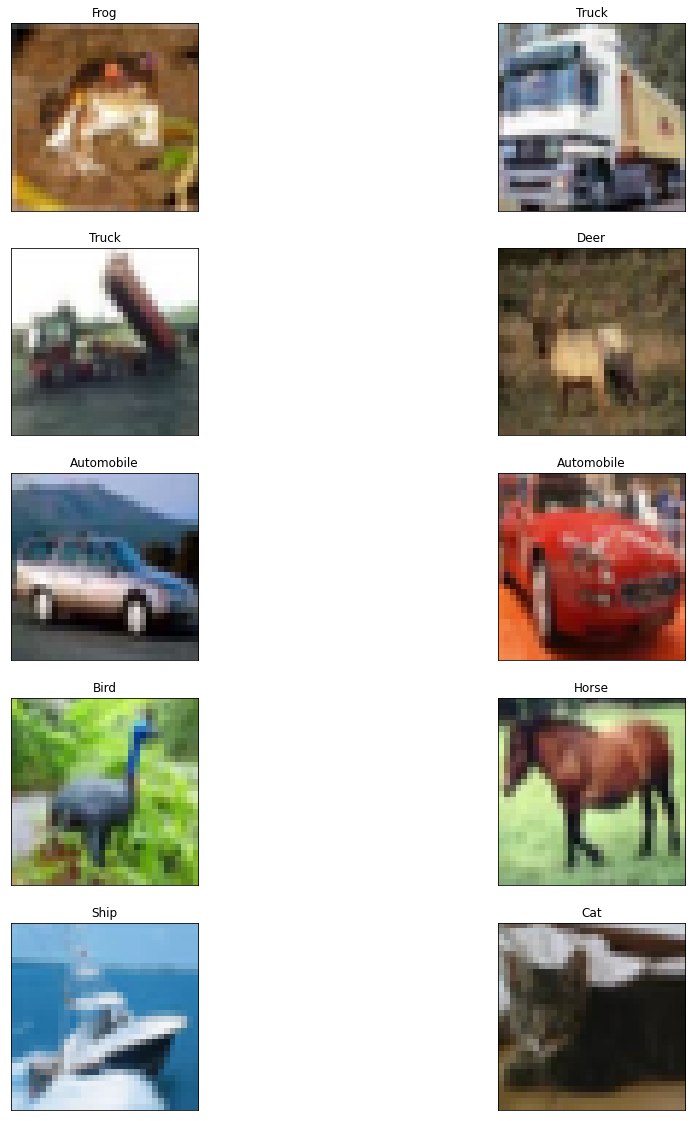

In [16]:
plt.figure(figsize=(16,20))
for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
    
#  print(training_labels[i])
plt.show()

In [10]:
training_images = training_images/255
testing_images = testing_images/255

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(len(np.unique(training_labels)), activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [12]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics = ["accuracy"]) 

In [13]:
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 137s 87ms/step - loss: 1.6280 - accuracy: 0.4152
Epoch 2/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.2375 - accuracy: 0.5788
Epoch 3/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0883 - accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 130s 83ms/step - loss: 1.0085 - accuracy: 0.6682
Epoch 5/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9482 - accuracy: 0.6880
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 0.9297 - accuracy: 0.6991
Epoch 7/10
1563/1563 [==============================] - 129s 82ms/step - loss: 0.9302 - accuracy: 0.7053
Epoch 8/10
1563/1563 [==============================] - 134s 86ms/step - loss: 0.9426 - accuracy: 0.7037
Epoch 9/10
1563/1563 [==============================] - 137s 88ms/step - loss: 0.9672 - accuracy: 0.6964
Epoch 10/10
1563/1563 [==============================] 

Model Performance

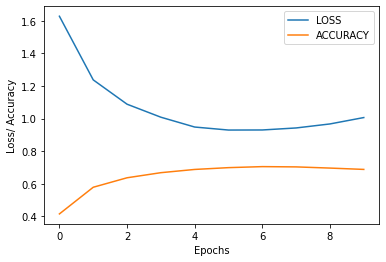

In [14]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['accuracy'], label="ACCURACY")
plt.xlabel('Epochs')
plt.ylabel('Loss/ Accuracy')

plt.legend(loc='best')
plt.show()

In [18]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [19]:
print(accuracy_score(testing_labels, pred))

0.6855


Prediction:

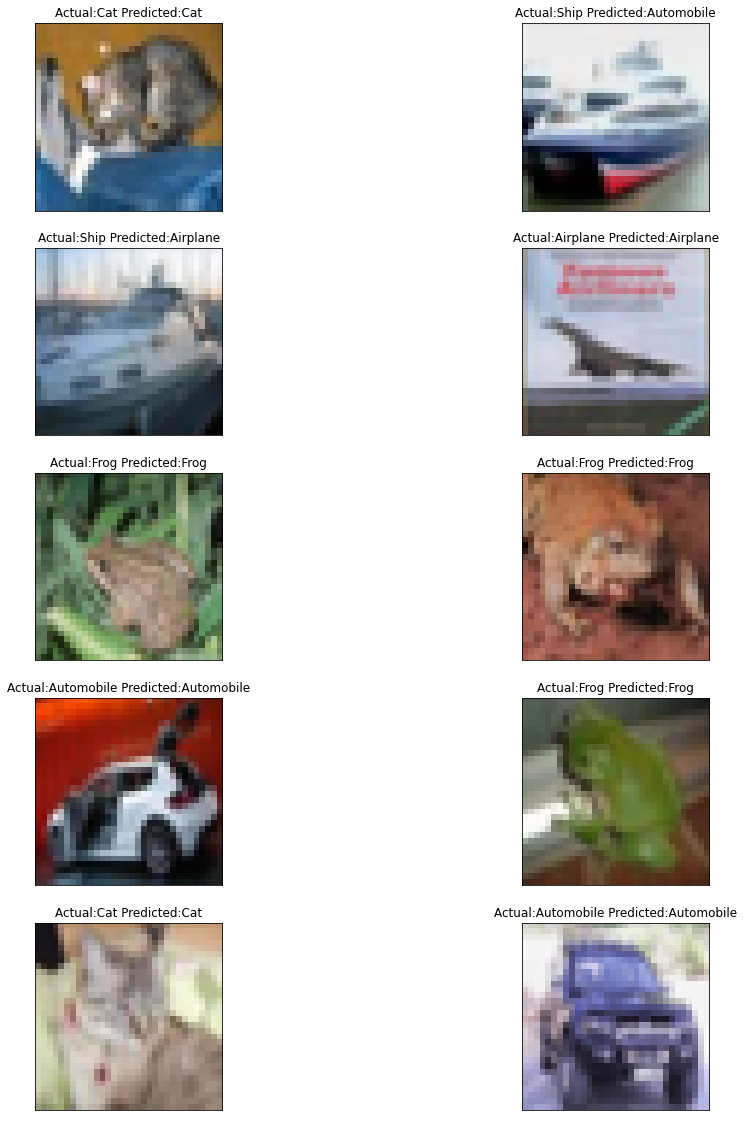

In [20]:
plt.figure(figsize=(16,20))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[testing_labels[i][0]] + " Predicted:" + labels[pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
    
plt.show()